In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [73]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)


In [74]:
plt.style.use('default')


In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
%%time
df_add = pd.read_csv('/content/drive/MyDrive/Финал - Data science/Финал - Data science/Cup_IT_2022_Data_Science_additional_data.csv',
                     index_col=0).drop(columns='index')
df = pd.read_csv('/content/drive/MyDrive/Финал - Data science/Финал - Data science/Cup_IT_2022_Data_Science_dataset_final.csv.csv')
df = df_add.join(df['is_in_club'])
y = df['is_in_club'] # label
for column in df:
    y = y[(df[column]>=0) + (df[column].isna())]
    df = df[(df[column]>=0) + (df[column].isna())]

CPU times: user 2.4 s, sys: 367 ms, total: 2.77 s
Wall time: 3.01 s


In [77]:
df

,cnt_unique_plu_6,cnt_unique_plu_7,cnt_unique_plu_8,cnt_unique_plu_9,cnt_unique_plu_10,cnt_unique_plu_11,cnt_unique_plu_12,cnt_unique_plu_10_Мясная гастрономия,cnt_unique_plu_10_Овощи - Фрукты,cnt_unique_plu_10_Птица и изделия из птицы,...,cnt_unique_plu_12_Сыры,cnt_unique_plu_6_Крупы и зерновые,cnt_unique_plu_6_Сыры,cnt_unique_plu_7_Крупы и зерновые,cnt_unique_plu_7_Сыры,cnt_unique_plu_8_Крупы и зерновые,cnt_unique_plu_8_Сыры,cnt_unique_plu_9_Крупы и зерновые,cnt_unique_plu_9_Сыры,is_in_club
0,18.0,8.0,40.0,8.0,15.0,15.0,38.0,NaN,NaN,NaN,...,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,60.0,60.0,76.0,32.0,70.0,20.0,NaN,1.0,22.0,1.0,...,NaN,NaN,2.0,NaN,3.0,NaN,4.0,1.0,1.0,0
2,4.0,4.0,17.0,NaN,1.0,10.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,113.0,65.0,37.0,42.0,14.0,9.0,NaN,2.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,64.0,21.0,33.0,60.0,40.0,90.0,62.0,1.0,6.0,NaN,...,NaN,NaN,2.0,NaN,1.0,NaN,2.0,NaN,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135056,NaN,NaN,NaN,5.0,8.0,16.0,11.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
135057,NaN,NaN,NaN,50.0,75.0,76.0,77.0,1.0,12.0,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,0
135058,NaN,NaN,NaN,13.0,68.0,18.0,48.0,NaN,5.0,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
135059,NaN,NaN,NaN,3.0,27.0,13.0,27.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


### Выделим категории товаров

In [78]:
cats = set()
for col in df.drop(columns='is_in_club').columns:
    cat = col.split('_')[-1]
    if not cat.isdigit():
        cats.add(cat)
cats = list(cats)   
cats

['Мясная гастрономия',
 'Птица и изделия из птицы',
 'Овощи - Фрукты',
 'Крупы и зерновые',
 'Рыба и рыбные изделия',
 'Сыры']

### Доля клиентов в клубе

In [79]:
in_club_percent = round(df.is_in_club.sum() / df.shape[0] * 100, 1) #  Доля пользователей, состоящих в клубе
in_club_percent

9.2

### Среднее количество уникальных товаров в клубе и вне клуба

In [80]:
cols = [f'cnt_unique_plu_{n}' for n in range(6, 13)]

In [81]:
cols

['cnt_unique_plu_6',
 'cnt_unique_plu_7',
 'cnt_unique_plu_8',
 'cnt_unique_plu_9',
 'cnt_unique_plu_10',
 'cnt_unique_plu_11',
 'cnt_unique_plu_12']

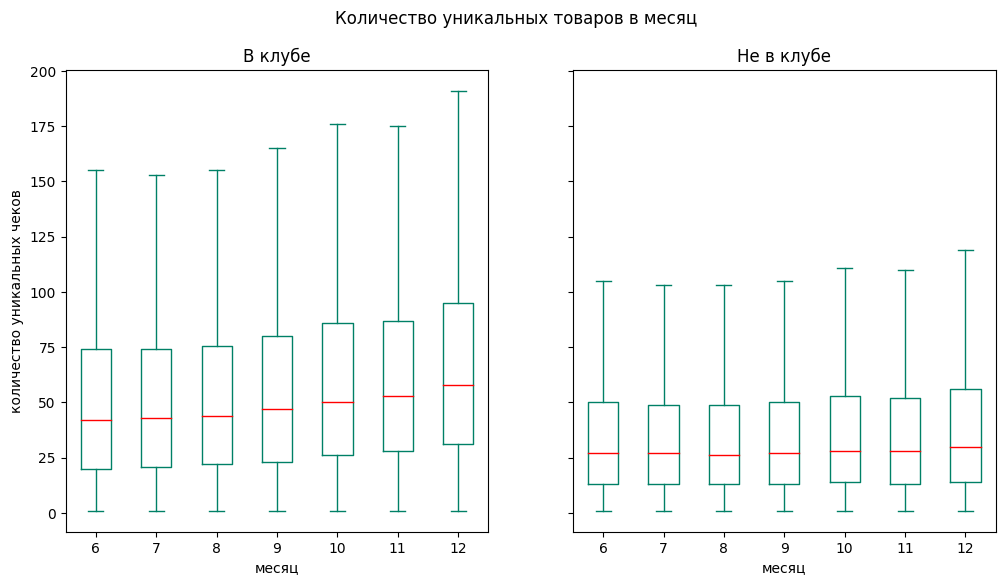

In [82]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
fig.suptitle('Количество уникальных товаров в месяц')
for f in range(2):
    df[df.is_in_club == 1 - f][cols].plot(kind='box',
                                          showfliers=False,
                                          ax=axs[f],
                                          cmap='summer',
                                          color={'medians': 'red'},
                                          ylabel='количество уникальных чеков')
    axs[f].set_xticklabels(np.arange(6, 13))
    axs[f].set_xlabel('месяц')
    axs[f].set_title('В клубе' if (1-f) else 'Не в клубе')

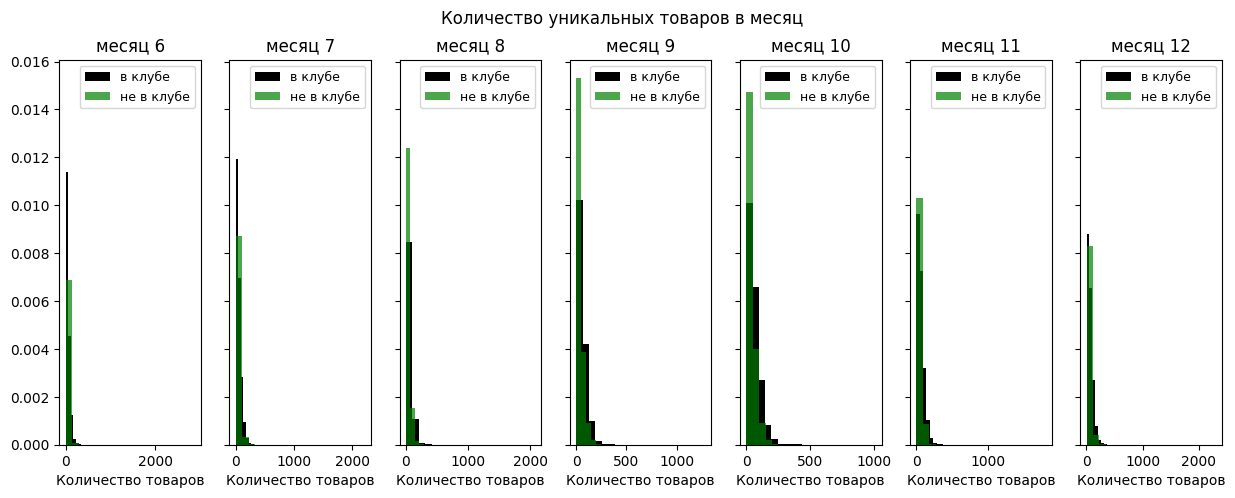

In [83]:
fig, axs = plt.subplots(1, 7, figsize=(15, 5), sharey=True)
fig.suptitle('Количество уникальных товаров в месяц')
for f in range(7):
    axs[f].hist(df[df.is_in_club == 1][cols[f]], bins=20, density=True, color='black', stacked=True, label='в клубе')
    axs[f].hist(df[df.is_in_club == 0][cols[f]], bins=20, density=True, color='green', alpha=0.7, stacked=True, label='не в клубе')
    axs[f].set_xlabel('Количество товаров')
    axs[f].legend(prop={'size': 9})
    axs[f].set_title(f'месяц {f + 6}')

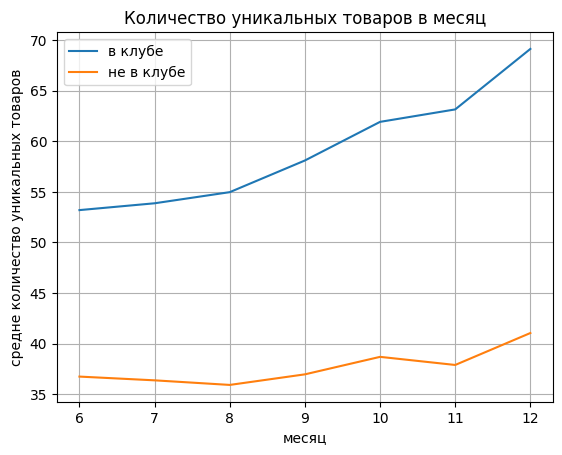

In [84]:
plt.plot(np.arange(6,13), [df[df.is_in_club == 1][f'cnt_unique_plu_{n}'].mean() for n in range(6,13)], label='в клубе')
plt.plot(np.arange(6,13), [df[df.is_in_club == 0][f'cnt_unique_plu_{n}'].mean() for n in range(6,13)], label='не в клубе')
plt.legend()
plt.xlabel('месяц')
plt.ylabel('средне количество уникальных товаров')
plt.grid(True)
plt.title('Количество уникальных товаров в месяц')
plt.show()

In [85]:
in_out_comparrison_value = pd.DataFrame(index=np.arange(6,13),
                                  columns=['mean_in_club', 'mean_out_club', 'std_in_club', 'std_out_club'],
                                  data=[[df[df.is_in_club == 1][f'cnt_unique_plu_{n}'].mean(),
                                         df[df.is_in_club == 0][f'cnt_unique_plu_{n}'].mean(),
                                         df[df.is_in_club == 1][f'cnt_unique_plu_{n}'].std(),
                                         df[df.is_in_club == 0][f'cnt_unique_plu_{n}'].std()
                                        ] for n in range(6, 13)]
                                  )
in_out_comparrison_value = in_out_comparrison_value.style.set_caption('Среднее значение и отклонение количества уникальных товаров в месяц')
in_out_comparrison_value = in_out_comparrison_value.format('{:.1f}')
in_out_comparrison_value

,mean_in_club,mean_out_club,std_in_club,std_out_club
6,53.2,36.7,46.8,34.9
7,53.9,36.4,47.2,35.0
8,55.0,35.9,51.0,34.7
9,58.1,37.0,50.3,34.5
10,61.9,38.7,50.1,35.6
11,63.1,37.9,48.5,35.1
12,69.1,41.0,53.1,37.9


### Рейтинг категорий в клубе и вне клуба (по количеству уникальных товаров)

In [86]:
cols_cat_rto = [[f'cnt_unique_plu_{n}_{cat}' for n in range(6, 13)] for cat in cats]

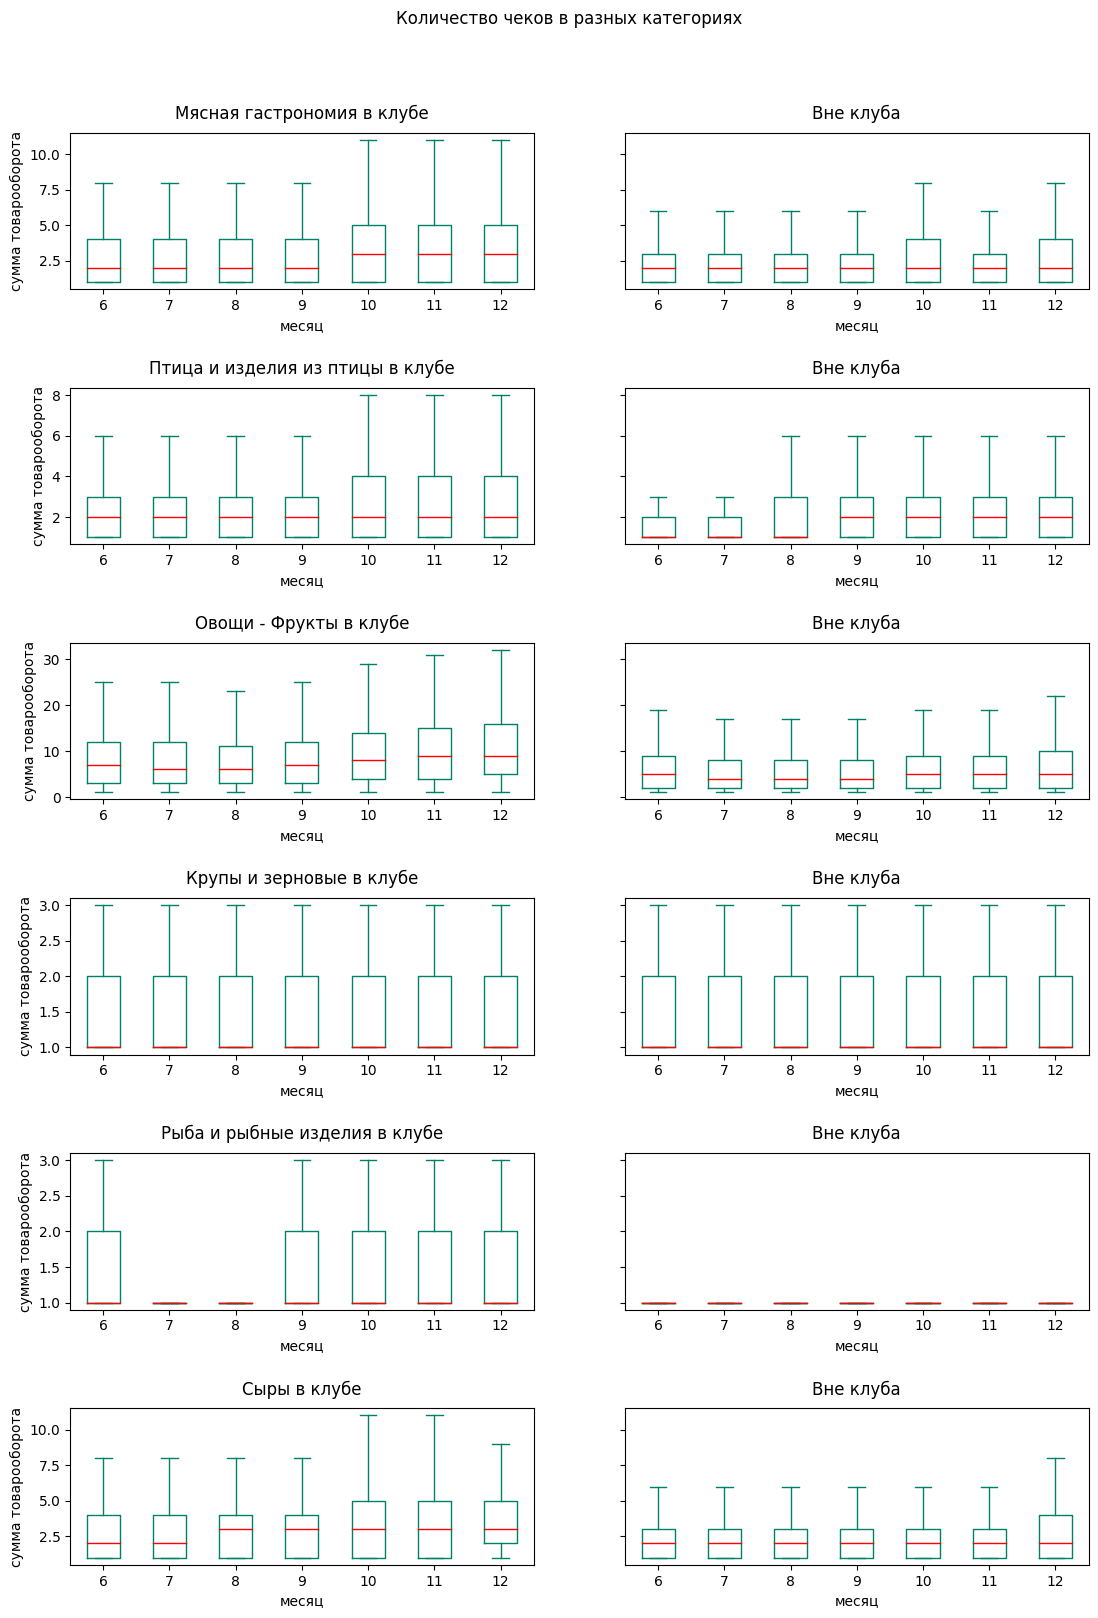

In [87]:
fig, axs = plt.subplots(len(cats), 2, figsize=(12,16), sharey='row')

fig.suptitle('Количество чеков в разных категориях', y=1.03)
fig.tight_layout(pad=5)
for n in range(len(cats)):
    for f in range(2):
        df[df.is_in_club == 1 - f][cols_cat_rto[n]].plot(kind='box', showfliers=False,
                                                         ax=axs[n, f], cmap='summer',
                                                         color={'medians': 'red'},
                                                         ylabel='сумма товарооборота',)
        axs[n, f].set_xticklabels(np.arange(6, 13))
        axs[n, f].set_title(cats[n] + ' в клубе' if (1-f) else 'Вне клуба', pad=10)
        axs[n, f].set_xlabel('месяц')


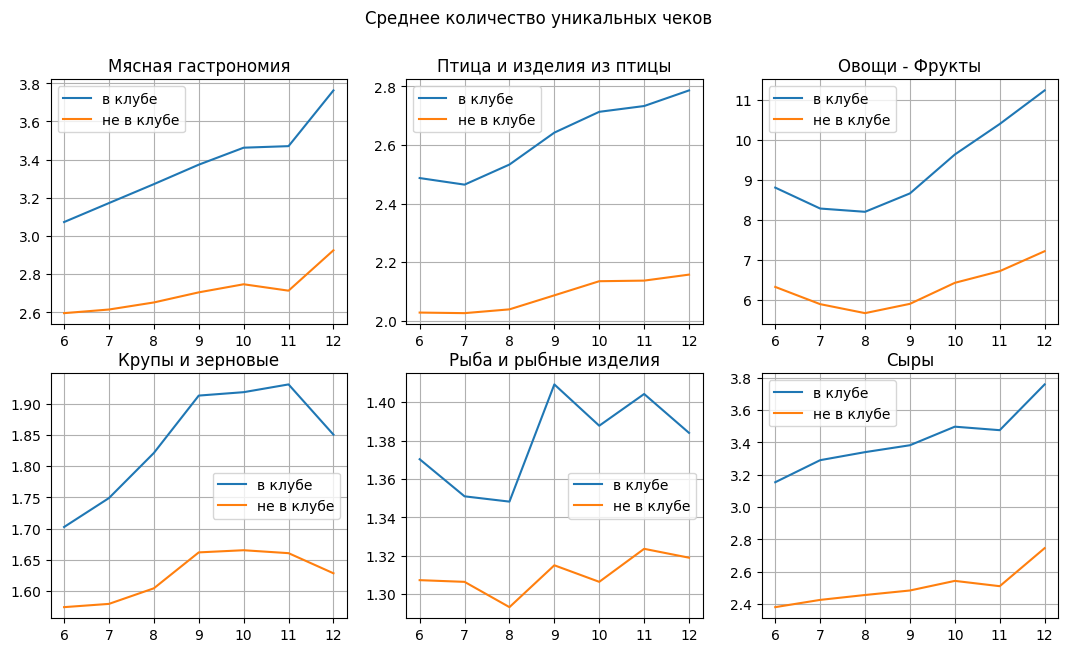

In [88]:
fig, axs = plt.subplots(2, 3, figsize=(13, 7))
fig.suptitle('Среднее количество уникальных чеков')
k = -1
for i in range(2):
    for j in range(3):
        k += 1
        axs[i, j].plot(np.arange(6,13), [df[df.is_in_club == 1][f'cnt_unique_plu_{n}_{cats[k]}'].mean() for n in range(6,13)], label='в клубе')
        axs[i, j].plot(np.arange(6,13), [df[df.is_in_club == 0][f'cnt_unique_plu_{n}_{cats[k]}'].mean() for n in range(6,13)], label='не в клубе')
        axs[i,j].set_title(f'{cats[k]}')
        axs[i, j].grid(True)
        axs[i, j].legend()
        

In [89]:
# среднее за весь период количество уникальных товаров в месяц в определённой категории
for cat in cats:
    for n in range(6,13): 
        try:
            df[f'mean_cnt_unique_plu_{cat}'] += df[f'cnt_unique_plu_{n}_{cat}'] / 7
        except KeyError:
            df[f'mean_cnt_unique_plu_{cat}'] = df[f'cnt_unique_plu_{n}_{cat}'] / 7

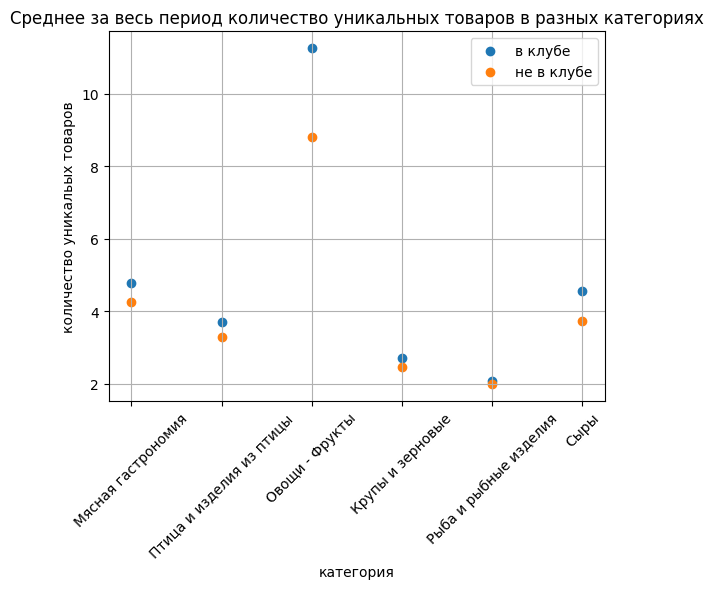

In [90]:
plt.scatter(cats, [df[df.is_in_club == 1][f'mean_cnt_unique_plu_{cat}'].mean() for cat in cats], label='в клубе')
plt.scatter(cats, [df[df.is_in_club == 0][f'mean_cnt_unique_plu_{cat}'].mean() for cat in cats], label='не в клубе')
plt.legend()
plt.xlabel('категория')
plt.ylabel('количество уникальых товаров')
plt.grid(True)
plt.title('Среднее за весь период количество уникальных товаров в разных категориях')
plt.xticks(rotation=45)
plt.show()


In [91]:
cats_new = cats[:2]+cats[4:] # берём определенные категории

In [92]:
cats_new

['Мясная гастрономия',
 'Птица и изделия из птицы',
 'Рыба и рыбные изделия',
 'Сыры']

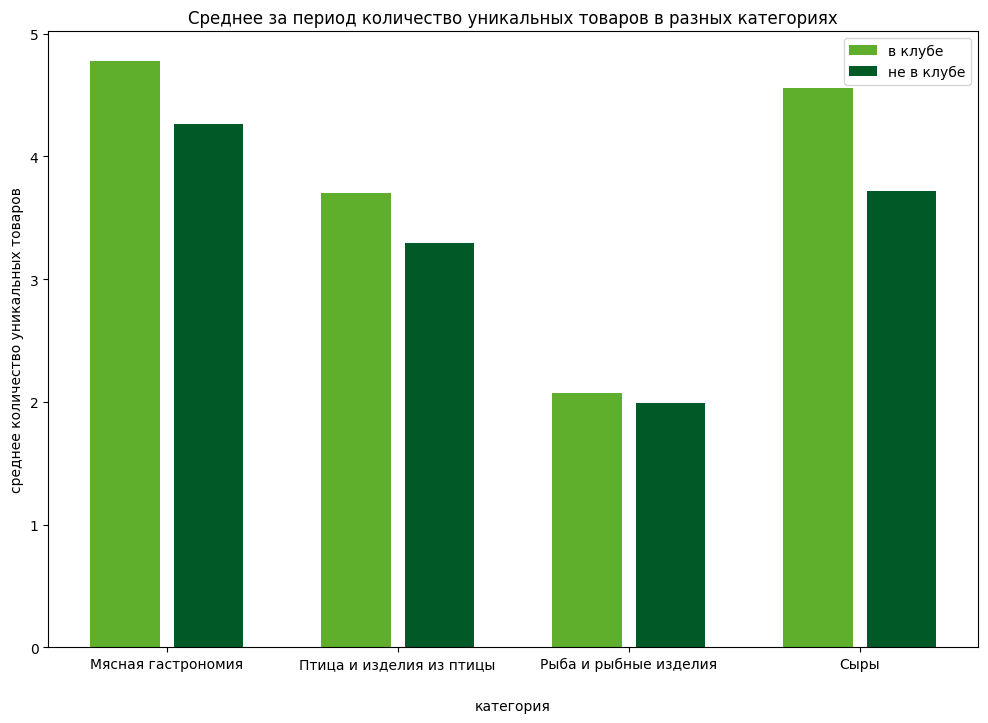

In [93]:
X_axis  = np.arange(len(cats_new))
plt.figure(figsize=(12,8))
plt.bar(X_axis - 0.18, [df[df.is_in_club == 1][f'mean_cnt_unique_plu_{cat}'].mean() for cat in cats_new], 0.3, label='в клубе', color='#5faf2d')
plt.bar(X_axis + 0.18, [df[df.is_in_club == 0][f'mean_cnt_unique_plu_{cat}'].mean() for cat in cats_new], 0.3, label='не в клубе', color='#005a28')
plt.xticks(X_axis, cats_new)
plt.legend()
plt.xlabel('категория', labelpad=20)
plt.ylabel('среднее количество уникальных товаров')
#plt.grid(True)
plt.title('Среднее за период количество уникальных товаров в разных категориях')
plt.xticks(rotation=0)
plt.show()


In [94]:
mean_rto_in = np.array([df[df.is_in_club == 1][f'mean_cnt_unique_plu_{cat}'].mean() for cat in cats])
mean_rto_out = np.array([df[df.is_in_club == 0][f'mean_cnt_unique_plu_{cat}'].mean() for cat in cats]) 
delta = mean_rto_in - mean_rto_out
delta_df = pd.DataFrame(columns=cats, index=['разница (in – out)', 'относительная разница, %'],
             data=[delta, np.round(delta / mean_rto_out * 100, 1)]).T
delta_df = delta_df.style.set_caption('Разница в количестве уникальных товаров')
delta_df = delta_df.format('{:.1f}')  
delta_df

,разница (in – out),"относительная разница, %"
Мясная гастрономия,0.5,12.0
Птица и изделия из птицы,0.4,12.4
Овощи - Фрукты,2.4,27.7
Крупы и зерновые,0.2,9.8
Рыба и рыбные изделия,0.1,4.4
Сыры,0.8,22.5


### Отношение количества товаров в данных категориях к общему количеству товаров

In [95]:
for cat in cats:
    for n in range(6,13):
        df[f'cnt_unique_plu_ratio_{n}_{cat}'] = df[f'cnt_unique_plu_{n}_{cat}'] / df[f'cnt_unique_plu_{n}']

In [96]:
# отношение здорового к нездоровому
for cat in cats:
    for n in range(6,13):
        df[f'cnt_unique_plu_ratio_pos_neg_{n}_{cat}'] = df[f'cnt_unique_plu_{n}_{cat}'] / (df[f'cnt_unique_plu_{n}'] - df[f'cnt_unique_plu_{n}_{cat}'])

In [97]:
for n in range(6,13):   
    df[f'cnt_unique_plu_ratio_pos_neg_{n}'] = 0
    for cat in cats:   
        df[f'cnt_unique_plu_ratio_pos_neg_{n}'] +=  df[f'cnt_unique_plu_{n}_{cat}']
    
    df[f'cnt_unique_plu_ratio_pos_neg_{n}'] /= (df[f'cnt_unique_plu_{n}'] - df[f'cnt_unique_plu_ratio_pos_neg_{n}'])


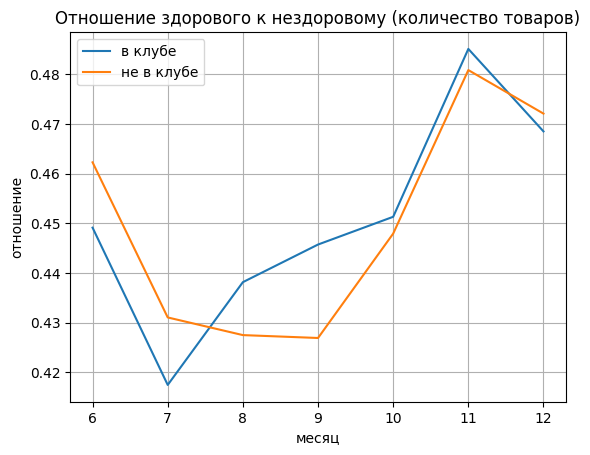

In [98]:
plt.plot(np.arange(6,13), [df[df.is_in_club == 1][f'cnt_unique_plu_ratio_pos_neg_{n}'].mean() for n in range(6,13)], label='в клубе')
plt.plot(np.arange(6,13), [df[df.is_in_club == 0][f'cnt_unique_plu_ratio_pos_neg_{n}'].mean() for n in range(6,13)], label='не в клубе')
plt.legend()
plt.xlabel('месяц')
plt.ylabel('отношение')
plt.grid(True)
plt.title('Отношение здорового к нездоровому (количество товаров)')
plt.show()

In [99]:
# среднее за весь период количество уникальных товаров в месяц в определённой категории
for cat in cats:
    for n in range(6,13): 
        try:
            df[f'mean_cnt_unique_plu_ratio_{cat}'] += df[f'cnt_unique_plu_ratio_{n}_{cat}'] / 7
        except KeyError:
            df[f'mean_cnt_unique_plu_ratio_{cat}'] = df[f'cnt_unique_plu_ratio_{n}_{cat}'] / 7

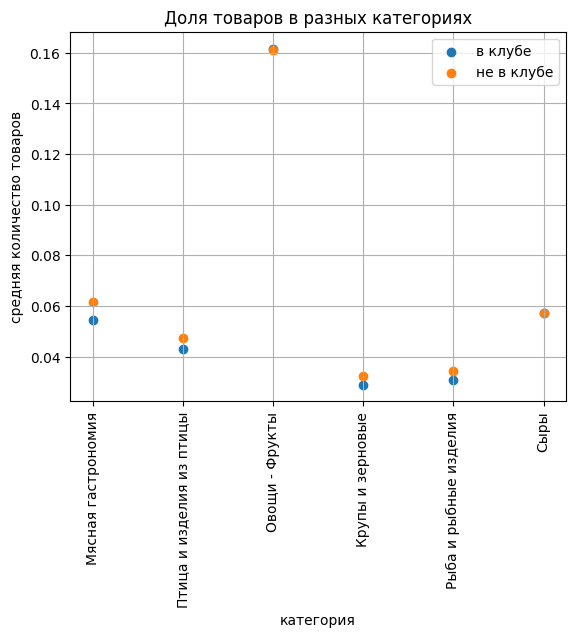

In [100]:
plt.scatter(cats, [df[df.is_in_club == 1][f'mean_cnt_unique_plu_ratio_{cat}'].mean() for cat in cats], label='в клубе')
plt.scatter(cats, [df[df.is_in_club == 0][f'mean_cnt_unique_plu_ratio_{cat}'].mean() for cat in cats], label='не в клубе')
plt.legend()
plt.xlabel('категория')
plt.ylabel('средняя количество товаров')
plt.grid(True)
plt.title('Доля товаров в разных категориях')
plt.xticks(rotation=90)
plt.show()


In [101]:
ratio_df = pd.DataFrame(columns=cats, index=['in, %','out, %'],
             data=[[np.round(df[df.is_in_club == 1][f'mean_cnt_unique_plu_ratio_{cat}'].mean() * 100, 1) for cat in cats],
                    [np.round(df[df.is_in_club == 0][f'mean_cnt_unique_plu_ratio_{cat}'].mean() * 100, 1) for cat in cats]
                   ]).T 
ratio_df = ratio_df.round(2)
ratio_df = ratio_df.style.set_caption('Доля товаров в определённой категории')
ratio_df = ratio_df.format('{:.1f}')  
ratio_df

,"in, %","out, %"
Мясная гастрономия,5.4,6.1
Птица и изделия из птицы,4.3,4.7
Овощи - Фрукты,16.2,16.1
Крупы и зерновые,2.9,3.2
Рыба и рыбные изделия,3.1,3.4
Сыры,5.7,5.7
